In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.DataFrame({
    'x':list(range(-100, 100, 5)),
})
df

In [ ]:
plt.plot(df['x'])

In [ ]:
df['x2'] = df['x']** 2  # degree 2
df['x3'] = df['x']** 3  # degree 3
df['x4'] = df['x']** 4  # degree 4

In [ ]:
df

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
ax1.plot(df['x'], label='degree 1', marker='o')
ax2.plot(df['x2'], label='degree 2', marker='x')
ax3.plot(df['x3'], label='degree 3', marker='+')
ax4.plot(df['x4'], label='degree 4', marker='s')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
plt.show()

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/regression/Position_Salaries.csv')
df

In [ ]:
sns.regplot(data=df, x='Level', y='Salary', marker='o')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_validate

In [ ]:
X = df[['Level']]
y = df['Salary']

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
pf = PolynomialFeatures(degree=5)
Xp = pf.fit_transform(X)
Xp

In [ ]:
reg = LinearRegression()
reg.fit(Xp, y)

In [ ]:
ypred = reg.predict(Xp)
r2_score(y, ypred)

In [ ]:
plt.scatter(X, y)
plt.plot(X, ypred, color='red')
plt.show()

In [ ]:
reg.predict(pf.transform([[11],[12],[13]])).astype(int)

creating a complete example

In [ ]:
df = pd.read_csv('../datasets/data_2.csv')
df

In [ ]:
from sklearn.model_selection import train_test_split

Metrics
MSE: 3771.370987040263
MAE: 49.6448165474487
R2: 0.13203734619005925


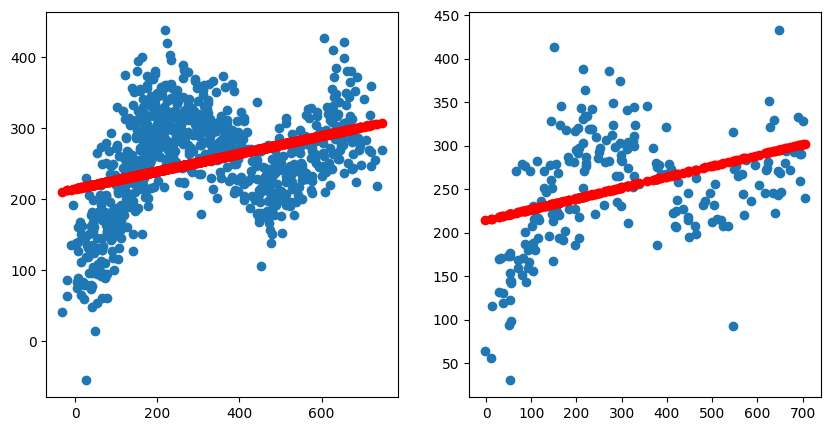

Metrics
MSE: 3039.3487314487975
MAE: 43.77774877872216
R2: 0.30050870098237525


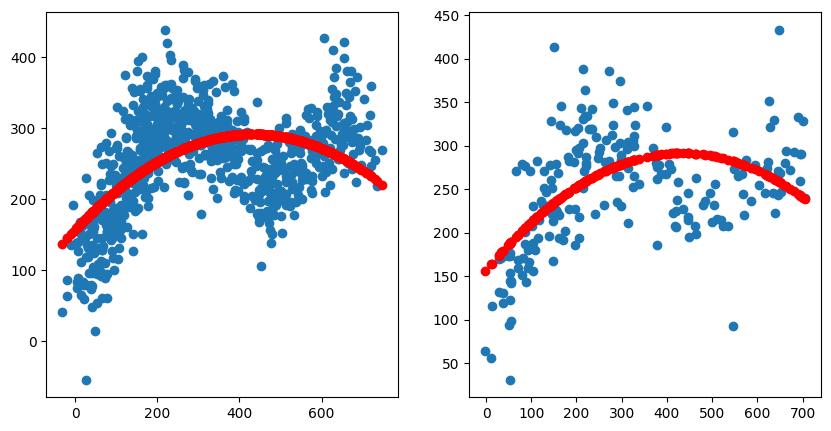

Metrics
MSE: 2026.209594001179
MAE: 34.18014013639533
R2: 0.5336777361792727


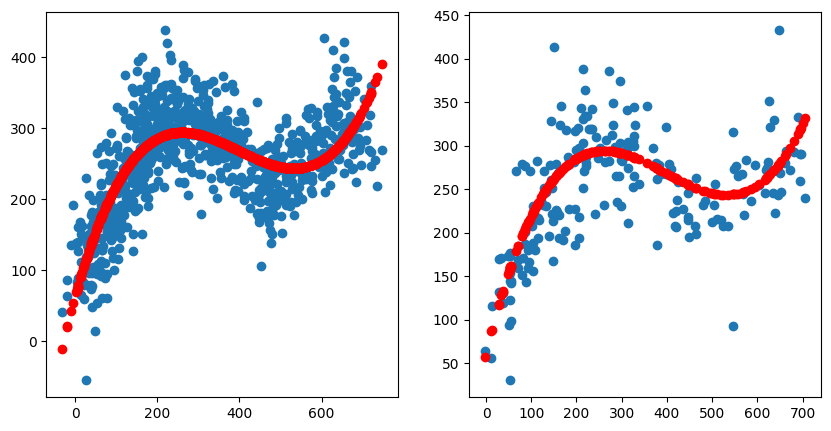

Metrics
MSE: 2029.056571996096
MAE: 34.3589106182467
R2: 0.5330225180677961


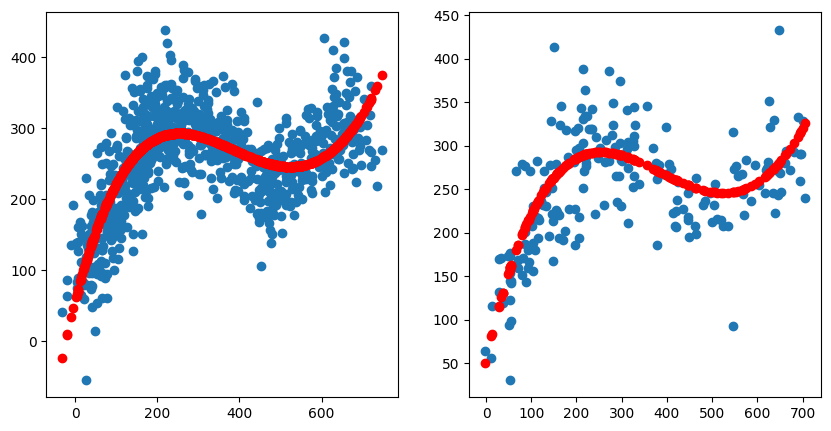

Metrics
MSE: 1960.0560653833627
MAE: 33.324848203147994
R2: 0.5489026484075639


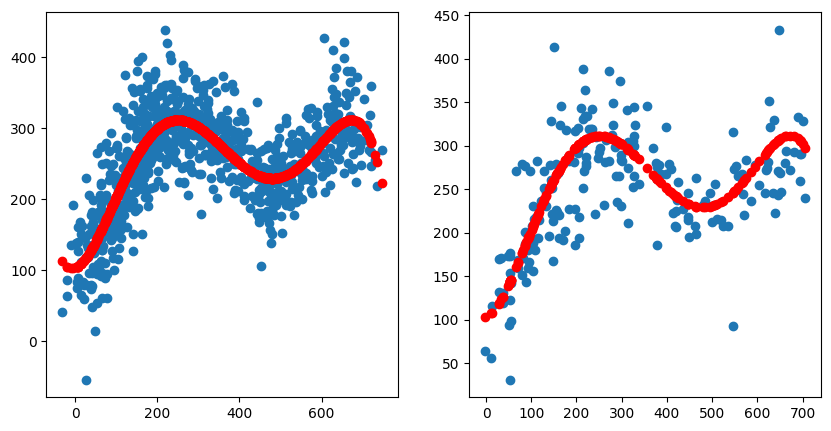

Metrics
MSE: 1968.4039640759825
MAE: 33.37714213453683
R2: 0.5469814202049073


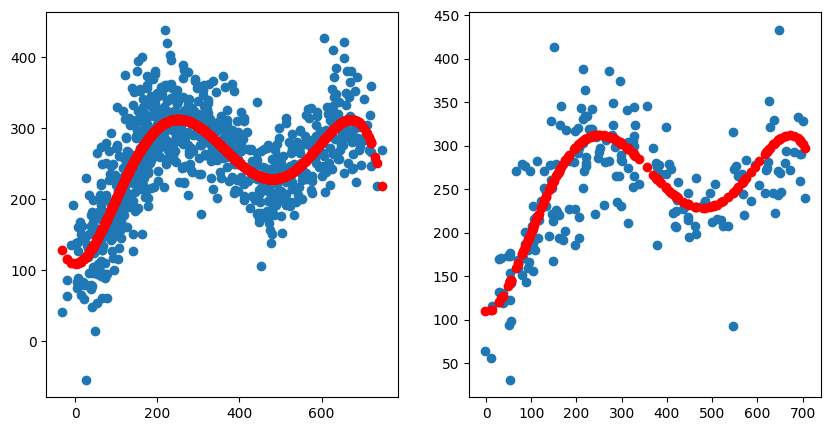

Metrics
MSE: 2092.118607137712
MAE: 34.40009113175898
R2: 0.5185090979974123


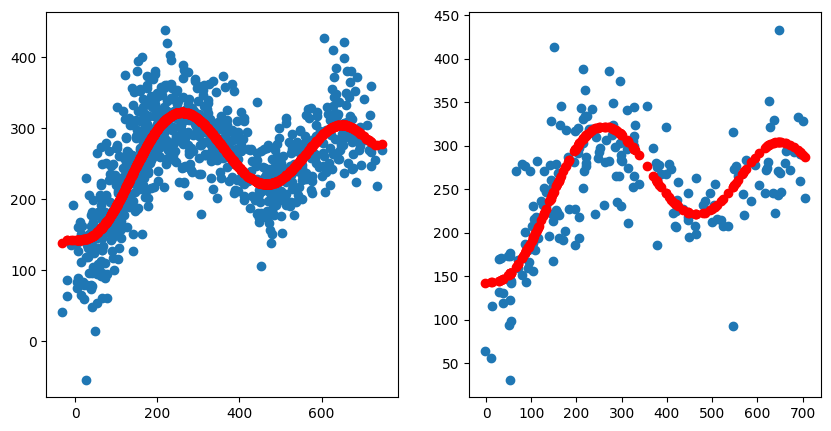

Metrics
MSE: 2372.099702694436
MAE: 37.22538783728199
R2: 0.45407281327466664


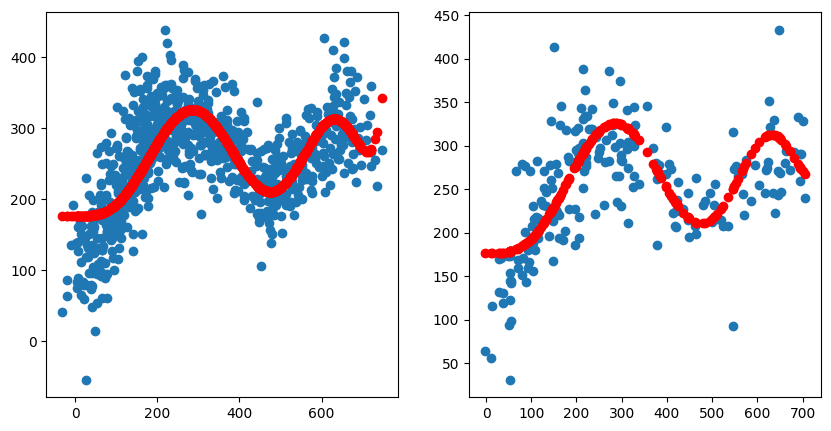

Metrics
MSE: 2787.277801057804
MAE: 40.825266595774046
R2: 0.3585215972056158


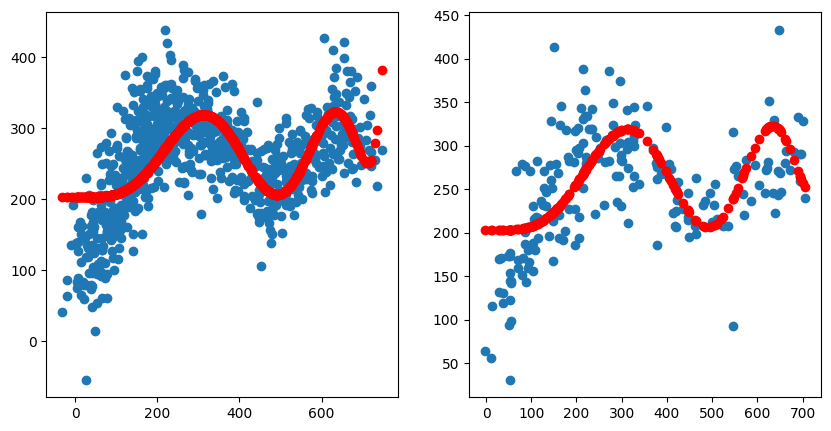

In [86]:
X = df[['x']]
y = df['y']
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size=0.2, random_state=0)
for degree in range(1, 10):
    model = Pipeline(steps=[
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', LinearRegression())
    ])
    model.fit(Xtrain, ytrain)
    ypred =  model.predict(Xtest)
    print('Metrics')
    print(f'MSE: {mean_squared_error(ytest, ypred)}')
    print(f'MAE: {mean_absolute_error(ytest, ypred)}')
    print(f'R2: {r2_score(ytest, ypred)}')

    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.scatter(Xtrain, ytrain)
    ax1.scatter(Xtrain, model.predict(Xtrain), c='red')
    ax2.scatter(Xtest, ytest)
    ax2.scatter(Xtest, ypred, c='red')
    plt.show()

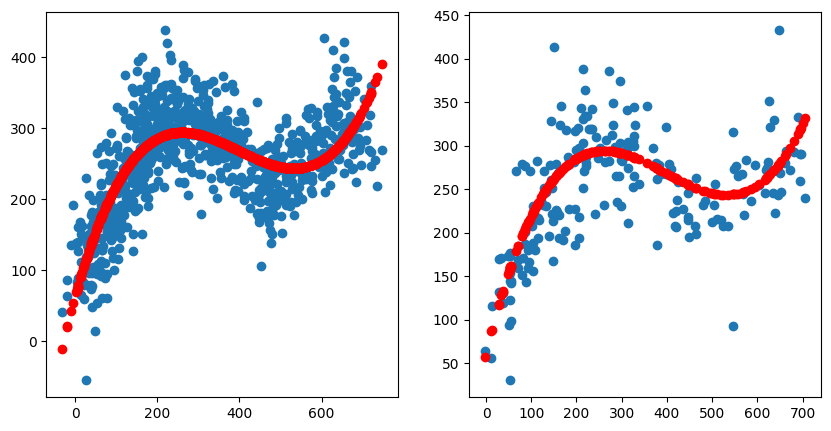